# 앙상블
## 평균 방법
* 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
* 결합 추정값은 분산이 줄어들기 때문에 단일 추정값조다 좋은 성능

## 부스팅 방법
* 순차적으로 모델 생성
* 결합된 모델의 편향을 감소 시키기 위해 노력
* 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축  

# Bagging meta-estimator
* bagging은 bootstrap aggregating의 줄임말
* 데이터셋 일부를 사용해 모델 훈련
* 분산을 줄이고 과적합 방지
* 강력하고 복잡한 모델 작동

In [9]:
from sklearn.datasets import load_iris, load_boston, load_wine, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## bagging을 사용한 분류

### KNN
* 붓꽃 데이터

In [18]:
iris = load_iris()

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators= 10, max_samples=0.5, max_features= 0.5)

In [23]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0019963264465332033 (+/-0.0014755729397002706)
avg score time : 0.002412271499633789 (+/-0.0006912780398081939)
avg test time : 0.96 (+/-0.024944382578492935)


In [24]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.022233963012695312 (+/-0.0028689399177837375)
avg score time : 0.007528972625732422 (+/-0.00023502177917527687)
avg test time : 0.9400000000000001 (+/-0.024944382578492935)


### SVC

In [30]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators= 10, max_samples=0.5, max_features= 0.5)

In [31]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0018630504608154296 (+/-0.0006326772089907584)
avg score time : 0.0006959438323974609 (+/-0.00024767419577246706)
avg test time : 0.9666666666666666 (+/-0.02108185106778919)


In [32]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03096170425415039 (+/-0.003623621571349394)
avg score time : 0.004595279693603516 (+/-0.0010437109599748982)
avg test time : 0.9400000000000001 (+/-0.024944382578492935)


### Decision Tree

In [33]:
base_model = make_pipeline(
    StandardScaler(),
     DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators= 10, max_samples=0.5, max_features= 0.5)

In [34]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.001625823974609375 (+/-0.000391680885990774)
avg score time : 0.0005529403686523437 (+/-0.00010087190011397854)
avg test time : 0.9666666666666668 (+/-0.036514837167011066)


In [35]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.02591848373413086 (+/-0.0017055771008135606)
avg score time : 0.00274510383605957 (+/-7.676136361860828e-05)
avg test time : 0.9533333333333334 (+/-0.03399346342395189)


## bagging을 사용한 회귀

In [36]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### KNN

In [38]:
base_model= make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators= 0.5, max_features=0.5, max_samples=0.5)

In [39]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0019748687744140627 (+/-0.0006024962202411055)
avg score time : 0.002055454254150391 (+/-0.0005229840827014907)
avg test time : 0.47357748833823543 (+/-0.13243123464477455)


In [40]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0005479335784912109 (+/-8.956068176545445e-05)
avg score time : 0.0 (+/-0.0)
avg test time : nan (+/-nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 316, in _fit
    self._validate_estimator()
  File "/usr/local/lib/py

### SVR

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators= 0.5, max_features=0.5, max_samples=0.5)

In [43]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.015505123138427734 (+/-0.003422754112434252)
avg score time : 0.003603219985961914 (+/-7.327406283998971e-05)
avg test time : 0.17631266230186618 (+/-0.5224914915128981)


In [44]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0006783008575439453 (+/-0.00026680353573754534)
avg score time : 0.0 (+/-0.0)
avg test time : nan (+/-nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 316, in _fit
    self._validate_estimator()
  File "/usr/local/lib/py

### Decision Tree

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators= 0.5, max_features=0.5, max_samples=0.5)

In [46]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.004227399826049805 (+/-0.0004279046167156929)
avg score time : 0.0005590438842773438 (+/-4.485930307182445e-05)
avg test time : 0.14069040120085247 (+/-0.8014834011527564)


In [47]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y= boston.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0011608600616455078 (+/-0.0013560226743281533)
avg score time : 0.0 (+/-0.0)
avg test time : nan (+/-nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 316, in _fit
    self._validate_estimator()
  File "/usr/local/lib/py

# Forests of randomized trees
* RandomForest, Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

## Random Forests 분류

In [53]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [54]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.13961472511291503 (+/-0.007705253423552359)
avg score time : 0.010453462600708008 (+/-0.0004862350377830925)
avg test time : 0.96 (+/-0.024944382578492935)


## Random Forests 회귀

In [55]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [56]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.12002243995666503 (+/-0.006781763922296063)
avg score time : 0.009777402877807618 (+/-0.003133289537869467)
avg test time : 0.5494619999999999 (+/-0.4567505284134874)


## Extremely Randomized Trees 분류

In [57]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [58]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.10042715072631836 (+/-0.003974257852984643)
avg score time : 0.010278749465942382 (+/-5.64038901529068e-05)
avg test time : 0.9533333333333334 (+/-0.03399346342395189)


## Extremely Randomized Trees 회귀

In [59]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [60]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0825108528137207 (+/-0.0031194792308238566)
avg score time : 0.008849287033081054 (+/-0.0004771330535252697)
avg test time : 0.356032 (+/-0.4408627559978275)


## Random Forest, Extra Tree 시각화

In [101]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [102]:
n_classes = 5
n_estimators =30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [103]:
iris = load_iris()
plot_idx = 1
models =[DecisionTreeClassifier(max_depth= None),
         RandomForestClassifier(n_estimators= n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

In [ ]:
plt.figure(figsize = (16,8))

for pair in ([0,1],[0,2],[2,3]):
  
  for model in models:
    
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X-mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min , x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, camp = cmap)
    else:
      estimator_alpha = 1.0 /len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contour(xx, yy, Z ,alpha = estimator_alpha, camp = cmap)
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15,
                            c = Z_points_coarser, cmap = cmap,
                            edgecolor = 'none')
    plt.scatter(X[:, 0], X[:, 1], c =y,
                cmap = ListedColormap(['r','y','b']),
                edgecolor ='k', s= 20)
    plot_idx += 1
plt.suptitle('Classifiers', fontsize= 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()

In [121]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators= n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

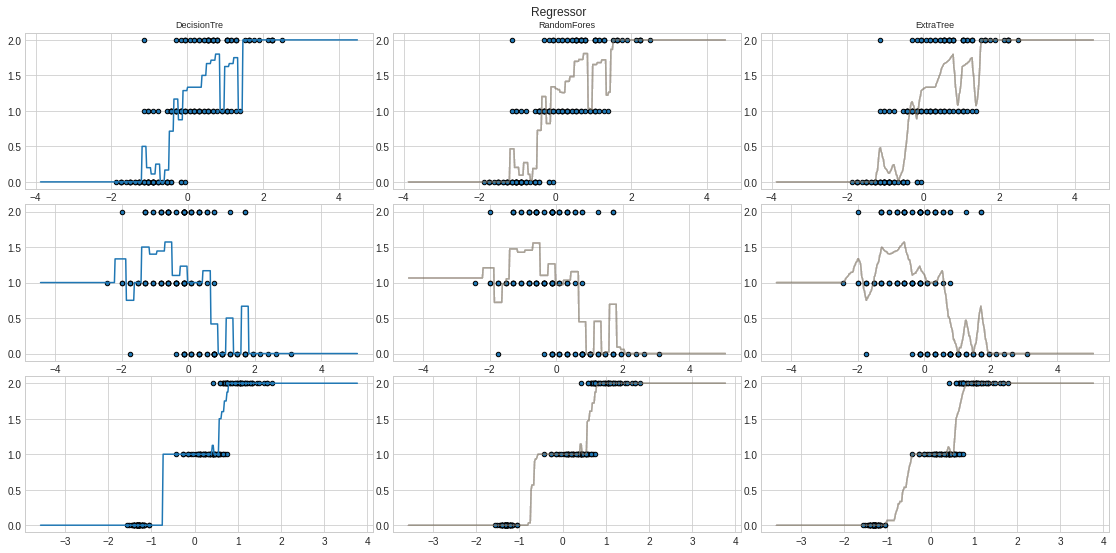

In [122]:
plt.figure(figsize = (16,8))

for pair in (0, 1, 2):
  
  for model in models:
    
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X-mean) / std

    model.fit(X.reshape(-1,1), y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1 , x_max+1, plot_step),np.arange(y_min-1, y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx,Z)
    else:
      estimator_alpha = 1.0 /len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z ,alpha = estimator_alpha)

    plt.scatter(X, y,
                edgecolor ='k', s= 20)
    plot_idx += 1
plt.suptitle('Regressor', fontsize= 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()

# Adaboost
* 일련의 약한 모델들을 학습
* 가중치 투표를 통해 각 모델의 예측 값을 결합

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

## Adaboost 분류

In [124]:
model =make_pipeline(
    StandardScaler(), 
    AdaBoostClassifier()
)

In [125]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.06887187957763671 (+/-0.002969116031383495)
avg score time : 0.007374477386474609 (+/-0.0002704342920683831)
avg test time : 0.9466666666666667 (+/-0.03399346342395189)


## Adaboost 회귀

In [126]:
model =make_pipeline(
    StandardScaler(), 
    AdaBoostRegressor()
)

In [127]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.014809942245483399 (+/-0.008846341654328656)
avg score time : 0.001324605941772461 (+/-0.0005216853573158345)
avg test time : 0.5385162840136054 (+/-0.4528176089166919)


# Gradient Tree Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

## Gradient Tree Boosting 분류

In [129]:
model =make_pipeline(
    StandardScaler(), 
    GradientBoostingClassifier()
)

In [130]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.2158360481262207 (+/-0.007645768744028289)
avg score time : 0.0011621952056884766 (+/-5.992737184773081e-05)
avg test time : 0.9666666666666668 (+/-0.02108185106778919)


## Gradient Tree Boosting 회귀

In [131]:
model =make_pipeline(
    StandardScaler(), 
    GradientBoostingRegressor()
)

In [132]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time : {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time : {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03188886642456055 (+/-0.0015503090666137902)
avg score time : 0.0007873058319091796 (+/-3.4825895783579806e-05)
avg test time : 0.31277054933427645 (+/-0.40027399240018874)
